# Anime Analysis

### ABSTRACT

I am working on an anime dataset and will be extracting data from a data source and then will be munging them together to form a consistent dataset. I will perform several operations on the data and make sure that the tables of data are normalized. Then, I will be developing a database from the normalized data and display it in the form of an Entity-Relationship Diagram.

### DATA has been taken from the following source:

* CSV files

# Create a conceptual schema

A 'Conceptual Schema' is a high-level description of a business's informational needs. It typically includes only the main concepts and the main relationships among them. Typically this is a first-cut model, with insufficient detail to build an actual database. This level describes the structure of the whole database for a group of users. The conceptual model is also known as the data model that can be used to describe the conceptual schema when a database system is implemented. It hides the internal details of physical storage and targets on describing entities, datatype, relationships and constraints.

* Highly abstract
* Easily Understood
* Easily enhanced
* Only "Entities" visible
* Abstract Relationships

### Entities
* Anime
* Viewers
* Production

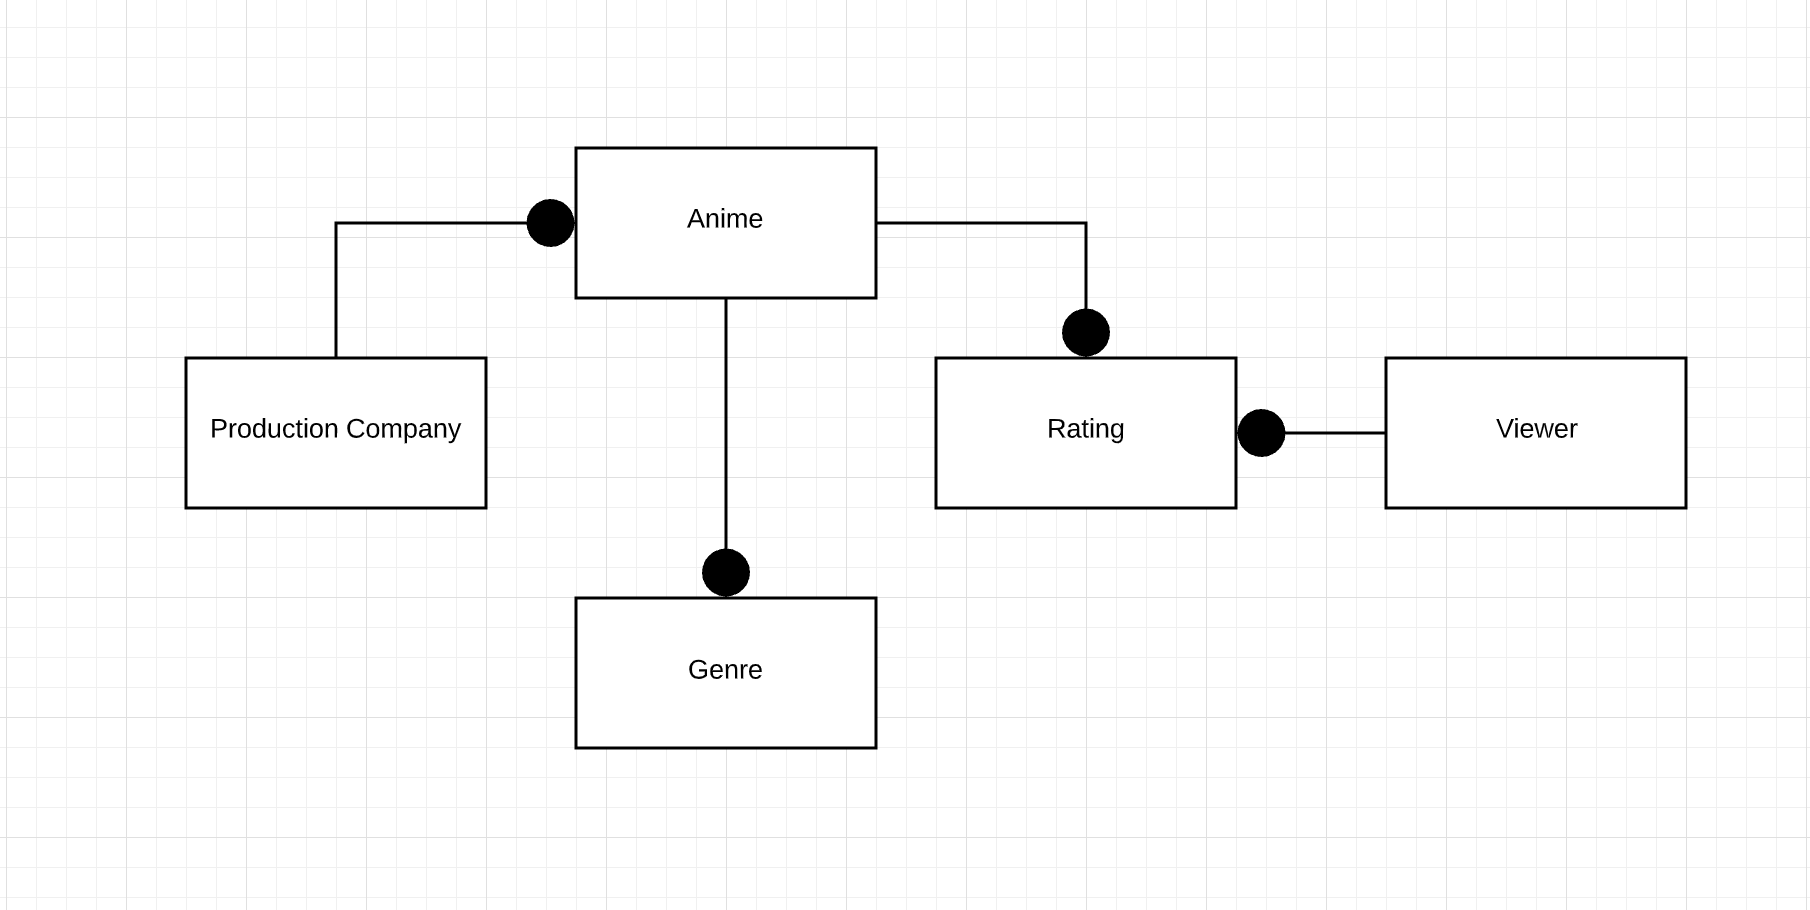

In [85]:
from IPython.display import Image
Image("/Users/shashank/Pers/NEU 2nd Sem/DMDD/assignment 2/Images/Conceptual.png")

### Questions you must answer about your conceptual model:
1. What are the ranges, data types and format of all of the attributes in your entities?
2. When should you use an entity versus attribute? (Example: address of a person could be modeled as either)
3. When should you use an entity or relationship, and placement of attributes? (Example:a manager could be modeled as either)
4. How did you choose your keys? Which are unique?
5. Did you model hierarchies using the “ISA” design element? Why or why not?
7. Where are you going find real-world data populate your model?

### Answers
1. Anime: Title(varchar), Type(varchar), Source(varchar), Description(varchar), Episodes(int), Rated(varchar),       AiringStatus(varchar)
Viewer: UserID(varchar), ViewerName(varchar), Address(varchar), Gender(varchar), Birthdate(Date)
Production: ProductionName(varchar), Title(varchar)
Genre: Title(varchar), Genre(varchar)
Rating: Title(varchar), UserID(varchar), Rating(int), Review(varchar)

2. The basic difference between entity and attribute is that an entity is a distinguishable real-world object that exists, whereas attribute describes the elementary features of an entity and hence our entities are taken.

3. It is completely dependent on the design and there is no such case in the schema.

4. For viewers, ID's are considered as primary key and for anime, titles are considered as primary key since they are unique.

5.  * Simplicity favors regularity
    – e.g., instruction size, instruction formats, data formats
    – eases implementation by simplifying hardware
    * Smaller is faster
    – fewer bits to read, move, & write
    – use/reuse the register file instead of memory
    * Make the common case fast
    – e.g., small constants are common, thus immediate fields
     can be small
    * Good design demands compromise
    – special formats for important exceptions
    – e.g., a jump far away (beyond a small constant) 
    
7. We found raw csv data of anime, users from kaggle website

# Create a physical schema

A physical data model is a representation of a data design as implemented, or intended to be implemented, in a database management system. In the lifecycle of a project it typically derives from a logical data model, though it may be reverse-engineered from a given database implementation.

1. Entities referred to as tables
2. Attributes referred to as columns
3. Database compatible table names
4. Database compatible table names
5. Database specific data types
6. Diffficult for users to understand

### Tables

* Anime
* Viewers
* Production
* Genre
* Rating

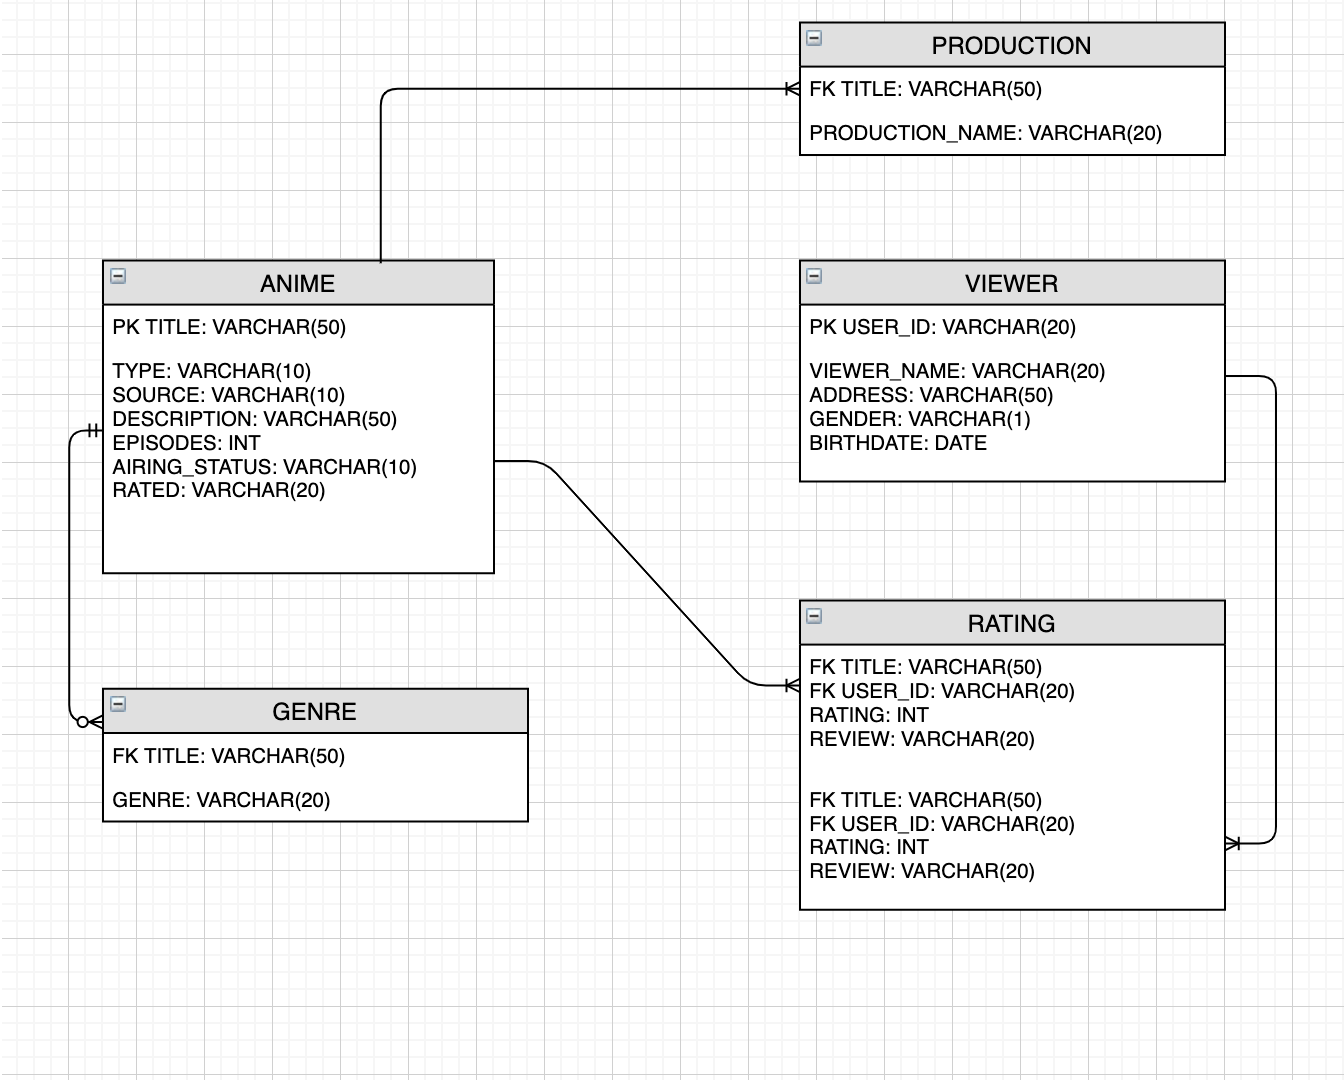

In [80]:
from IPython.display import Image
Image("/Users/shashank/Pers/NEU 2nd Sem/DMDD/assignment 2/Images/Physical.png")

Questions you must answer about your physical model:
1. Are all the tables in 1NF?
2. Are all the tables in 2NF?
3. Are all the tables in 3NF?

First normal form (1NF)
* Each table has a primary key: minimal set of attributes which can uniquely identify a record
    * Viewer table has userId as primary key which can uniquely identify a record.
    * Similarly, each table has a primary key which can uniquely identify a record.
* The values in each column of a table are atomic (No multi-value attributes allowed).
    * Values in each column of the tables are atomic.
* There are no repeating groups: two columns do not store similar information in the same table.
    * Every column in our database is unique and doesn't have any common data.

Second normal form (2NF)
* All requirements for 1st NF met
* No partial dependencies
* No calculated data 
    * No column can be calculated from other.

Third normal form (3NF)
* All requirements for 2nd NF must be met.
* Eliminate fields that do not directly depend on the primary key; that is no transitive dependencies.
    * Every table has attributes which are dependent on the primary key of the table.

## UML

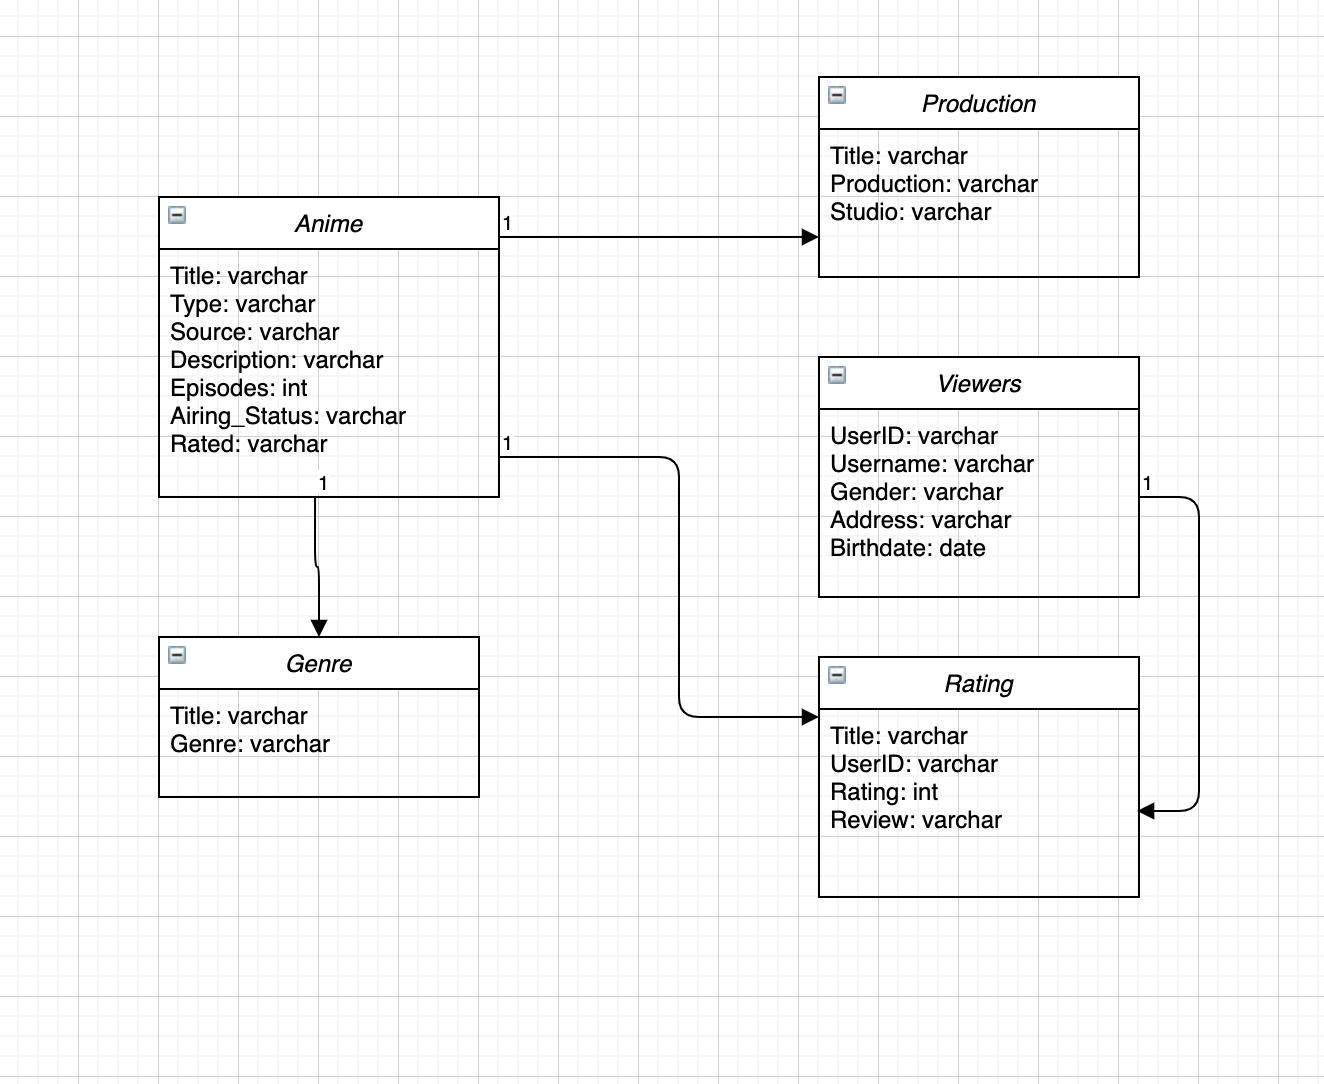

In [81]:
from IPython.display import Image
Image("/Users/shashank/Pers/NEU 2nd Sem/DMDD/assignment 2/Images/UML.png")

## Reformatting the data to fit into the conceptual schema

In [67]:
# importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [68]:
#Reading data from csv file which includes anime details
dataframe1 = pd.read_csv("animelist.csv",encoding='latin1')
dataframe1

title   type    source  episodes  \
0                         Inu x Boku SS     TV     Manga        12   
1                      Seto no Hanayome     TV     Manga        26   
2                    Shugo Chara!! Doki     TV     Manga        51   
3                         Princess Tutu     TV  Original        38   
4                   Bakuman. 3rd Season     TV     Manga        25   
..                                  ...    ...       ...       ...   
724             Busou Shinki Moon Angel    ONA     Other        10   
725                     Nagi no Asukara     TV  Original        26   
726      Tenjou Tenge: The Past Chapter  Movie     Manga         1   
727                   Shisha no Teikoku  Movie     Novel         1   
728  Final Fantasy VII: Advent Children  Movie      Game         1   

              status                          rating  \
0    Finished Airing       PG-13 - Teens 13 or older   
1    Finished Airing       PG-13 - Teens 13 or older   
2    Finished Airing                   PG - Children   
3    Finished Airing       PG-13 - Teens 13 or older   
4    Finished Airing       PG-13 - Teens 13 or older   
..               ...                             ...   
724  Finished Airing       PG-13 - Teens 13 or older   
725  Finished Airing       PG-13 - Teens 13 or older   
726  Finished Airing  R - 17+ (violence & profanity)   
727  Finished Airing  R - 17+ (violence & profanity)   
728  Finished Airing       PG-13 - Teens 13 or older   

                                            background  \
0    Inu x Boku SS was licensed by Sentai Filmworks...   
1                                                  NaN   
2                                                  NaN   
3    Princess Tutu aired in two parts. The first pa...   
4                                                  NaN   
..                                                 ...   
724                                                NaN   
725  Episode 1 was previewed at a screening in Toky...   
726                                                NaN   
727  Winner of the Platinum Grand Prize during the ...   
728  The film received the Honorary Maria Award at ...   

                           producer              studio  duration_min  \
0                           Aniplex    David Production          24.0   
1                          TV Tokyo               Gonzo          24.0   
2                          TV Tokyo           Satelight          24.0   
3                       Memory-Tech      Hal Film Maker          16.0   
4                               NHK           J.C.Staff          24.0   
..                              ...                 ...           ...   
724                             NaN  TNK, Kinema Citrus           5.0   
725  Geneon Universal Entertainment          P.A. Works          23.0   
726                             NaN            Madhouse          92.0   
727                             NaN          Wit Studio         120.0   
728                             NaN         Square Enix         101.0   

     aired_from_year      genre  
0               2012     Comedy  
1               2007     Comedy  
2               2008     Comedy  
3               2002     Comedy  
4               2012     Comedy  
..               ...        ...  
724             2011     Action  
725             2013      Drama  
726             2005  Adventure  
727             2015     Sci-Fi  
728             2005     Action  

[729 rows x 12 columns]

## Anime Table

In [69]:
#Iterating over the complete anime details and generating Anime Table
df1 = dataframe1.iloc[:, [7,8,11]]
AnimeTable = dataframe1[[col for col in dataframe1.columns if col not in df1.columns]]
AnimeTable

title   type    source  episodes  \
0                         Inu x Boku SS     TV     Manga        12   
1                      Seto no Hanayome     TV     Manga        26   
2                    Shugo Chara!! Doki     TV     Manga        51   
3                         Princess Tutu     TV  Original        38   
4                   Bakuman. 3rd Season     TV     Manga        25   
..                                  ...    ...       ...       ...   
724             Busou Shinki Moon Angel    ONA     Other        10   
725                     Nagi no Asukara     TV  Original        26   
726      Tenjou Tenge: The Past Chapter  Movie     Manga         1   
727                   Shisha no Teikoku  Movie     Novel         1   
728  Final Fantasy VII: Advent Children  Movie      Game         1   

              status                          rating  \
0    Finished Airing       PG-13 - Teens 13 or older   
1    Finished Airing       PG-13 - Teens 13 or older   
2    Finished Airing                   PG - Children   
3    Finished Airing       PG-13 - Teens 13 or older   
4    Finished Airing       PG-13 - Teens 13 or older   
..               ...                             ...   
724  Finished Airing       PG-13 - Teens 13 or older   
725  Finished Airing       PG-13 - Teens 13 or older   
726  Finished Airing  R - 17+ (violence & profanity)   
727  Finished Airing  R - 17+ (violence & profanity)   
728  Finished Airing       PG-13 - Teens 13 or older   

                                            background  duration_min  \
0    Inu x Boku SS was licensed by Sentai Filmworks...          24.0   
1                                                  NaN          24.0   
2                                                  NaN          24.0   
3    Princess Tutu aired in two parts. The first pa...          16.0   
4                                                  NaN          24.0   
..                                                 ...           ...   
724                                                NaN           5.0   
725  Episode 1 was previewed at a screening in Toky...          23.0   
726                                                NaN          92.0   
727  Winner of the Platinum Grand Prize during the ...         120.0   
728  The film received the Honorary Maria Award at ...         101.0   

     aired_from_year  
0               2012  
1               2007  
2               2008  
3               2002  
4               2012  
..               ...  
724             2011  
725             2013  
726             2005  
727             2015  
728             2005  

[729 rows x 9 columns]

In [70]:
AnimeTable.isnull().any()

title              False
type               False
source             False
episodes           False
status             False
rating             False
background          True
duration_min       False
aired_from_year    False
dtype: bool

## Production Table

In [71]:
#Iterating over the complete anime details and generating Production Table
ProductionTable = dataframe1.iloc[:, [0,7,8]]
ProductionTable

title                        producer  \
0                         Inu x Boku SS                         Aniplex   
1                      Seto no Hanayome                        TV Tokyo   
2                    Shugo Chara!! Doki                        TV Tokyo   
3                         Princess Tutu                     Memory-Tech   
4                   Bakuman. 3rd Season                             NHK   
..                                  ...                             ...   
724             Busou Shinki Moon Angel                             NaN   
725                     Nagi no Asukara  Geneon Universal Entertainment   
726      Tenjou Tenge: The Past Chapter                             NaN   
727                   Shisha no Teikoku                             NaN   
728  Final Fantasy VII: Advent Children                             NaN   

                 studio  
0      David Production  
1                 Gonzo  
2             Satelight  
3        Hal Film Maker  
4             J.C.Staff  
..                  ...  
724  TNK, Kinema Citrus  
725          P.A. Works  
726            Madhouse  
727          Wit Studio  
728         Square Enix  

[729 rows x 3 columns]

## Genre Table

In [72]:
#Iterating over the complete anime details and generating Genre Table
GenreTable = dataframe1.iloc[:, [0,11]]
GenreTable

title      genre
0                         Inu x Boku SS     Comedy
1                      Seto no Hanayome     Comedy
2                    Shugo Chara!! Doki     Comedy
3                         Princess Tutu     Comedy
4                   Bakuman. 3rd Season     Comedy
..                                  ...        ...
724             Busou Shinki Moon Angel     Action
725                     Nagi no Asukara      Drama
726      Tenjou Tenge: The Past Chapter  Adventure
727                   Shisha no Teikoku     Sci-Fi
728  Final Fantasy VII: Advent Children     Action

[729 rows x 2 columns]

## Viewer Table

In [73]:
#Reading data from csv file which includes viewers details
ViewerTable = pd.read_csv("viewerslist.csv",encoding='latin1')
ViewerTable

user_id          username  gender birth_date      location
0        user1          karthiga  Female    4/29/90       Chennai
1        user2  RedvelvetDaisuki  Female     1/1/95        Manila
2        user3         Damonashu    Male     8/1/91       Detroit
3        user4             bskai    Male   12/14/90       Nayarit
4        user5    terune_uzumaki  Female    8/24/98      Malaysia
...        ...               ...     ...        ...           ...
1093  user1094         labantnet    Male     9/3/82   Minneapolis
1094  user1095          Sinope_K  Female    5/24/97        France
1095  user1096       Tweedle_Dum    Male    9/11/94    Wonderland
1096  user1097            eddyak    Male    6/19/91        London
1097  user1098      mellow-osity  Female    2/27/86  Philadelphia

[1098 rows x 5 columns]

In [74]:
ViewerTable.isnull().any()

user_id       False
username      False
gender        False
birth_date    False
location      False
dtype: bool

## Rating Table

In [75]:
#Reading data from csv file which includes Rating details
RatingTable = pd.read_csv("ratinglist.csv",encoding='latin1')
RatingTable

userid                                              title  Rating
0        user1                     Zombie Clay Animation: Stuck!!       2
1        user1                                        Yami Shibai       2
2        user2  Yuusha ni Narenakatta Ore wa Shibushibu Shuush...       5
3        user3                  Yuuki Yuuna wa Yuushabu Shozoku 3       9
4        user4                     Yuu_Yuu_Hakusho: Eizou Hakusho       6
...        ...                                                ...     ...
1096  user1094                            Pokemon Diamond & Pearl       5
1097  user1095                          Sora no Otoshimono: Forte       7
1098  user1096                 Pokemon Diamond & Pearl: Clip Show       1
1099  user1097                                        Dennou Coil       6
1100  user1098                                   Haunted Junction       3

[1101 rows x 3 columns]

In [76]:
RatingTable.isnull().any()

userid    False
title     False
Rating    False
dtype: bool

### AUDIT VALIDITY/ACCURACY

By using few commands, most of the unwanted null values were deleted from the above rows and columns which gives a report on valid and accuarate data.

### AUDIT COMPLETNESS

In the real world, when a viewer requests for anime, a list of it will be displayed, similarly when we compare it with the above data, we get proper real-time data showing correct information for all the top-rated anime.

### AUDIT CONSISTENCY/UNIFORMITY

The data which has been used in this assignment shows a uniform relationship since they are linked to each other by a common attribute.

## REPORT

### Conceptual Schema
A 'Conceptual Schema' is a high-level description of a business's informational needs. It typically includes only the main concepts and the main relationships among them. Typically this is a first-cut model, with insufficient detail to build an actual database. This level describes the structure of the whole database for a group of users. The conceptual model is also known as the data model that can be used to describe the conceptual schema when a database system is implemented. It hides the internal details of physical storage and targets on describing entities, datatype, relationships and constraints.

### Physical Schema
A physical data model is a representation of a data design as implemented, or intended to be implemented, in a database management system. In the lifecycle of a project it typically derives from a logical data model, though it may be reverse-engineered from a given database implementation.

### Source of data
Raw data on anime and users has been accessed from kaggle website.

### Entities
* Anime
* Viewers
* Production

### Tables
* Anime
* Viewers
* Production
* Genre
* Rating

Anime: Title(varchar), Type(varchar), Source(varchar), Description(varchar), Episodes(int), Rated(varchar),       AiringStatus(varchar)
Viewer: UserID(varchar), ViewerName(varchar), Address(varchar), Gender(varchar), Birthdate(Date)
Production: ProductionName(varchar), Title(varchar)
Genre: Title(varchar), Genre(varchar)
Rating: Title(varchar), UserID(varchar), Rating(int), Review(varchar)

Code Used:
* By loading the csv file:                                                                                  
The data was extracted using a csv file on the system using the libraries like:                            
Pandas to a read the csv file and load it into data frames                                                    
read_csv method is used to read .csv file  

Iterating over the complete anime details found in the raw data and generating Anime Table as per Conceptual Schema
* df1 = dataframe1.iloc[:, [7,8,11]]
AnimeTable = dataframe1[[col for col in dataframe1.columns if col not in df1.columns]]

Iterating over the complete anime details found in the raw data and generating Production Table as per Conceptual Schema
* ProductionTable = dataframe1.iloc[:, [0,7,8]]

Iterating over the complete anime details found in the raw data and generating Genre Table as per Conceptual Schema
* GenreTable = dataframe1.iloc[:, [0,11]]


### CONCLUSION                                                                                                                                                                   
Primary focus of this assignment is to learn how to get the data from different sources, cleaning of data, checking null values present in the data, data munging and to reformat the data to fit a conceptual database model and also normalizing the data.

### CONTRIBUTION
###### Your contribution towards project. How much code did you write and how much you took from other site or some other source.                                                                            
I contributed By Own: 40%                                                                                      
By External source: 60%                                                                                        


### CITATIONS
##### Sources from where you have gained knowledge or used codes, data. It may include Web links, github links, code taken from somewhere etc.

* https://www.kaggle.com/fatihbilgin/story-of-anime
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc
* https://en.wikipedia.org/wiki/Conceptual_schema


### LICENSE
Copyright 2020 Naga Vuyyuru

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.